In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
PG = pd.read_csv("PG_1995-03_23_2017.csv", index_col = "Date", parse_dates=["Date"])
PG.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1995-01-03,15.46875,15.62500,15.43750,62.375,15.59375,3318400
1995-01-04,15.53125,15.65625,15.31250,61.875,15.46875,2218800
1995-01-05,15.37500,15.43750,15.21875,61.000,15.25000,2319600


In [3]:
PG.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5596.000000,5596.000000,5596.000000,5596.000000,5596.000000,5.596000e+03
mean,54.602503,55.053568,54.175233,76.129453,54.643849,8.499669e+06
std,18.780847,18.833890,18.731530,17.253265,18.777653,6.040139e+06
min,15.156250,15.406250,15.156250,44.180000,15.218750,6.142000e+05
25%,41.814374,42.287499,41.405937,63.037501,41.875000,5.188000e+06
50%,55.530000,55.938750,55.094999,74.165001,55.550001,7.319550e+06
75%,66.559998,66.930000,66.080002,86.312500,66.632497,1.013865e+07
max,93.500000,93.889999,93.139999,153.500000,93.459999,1.372872e+08


In [4]:
# Sample 5 rows
sample = PG.sample(5)
sample

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-04-26,66.639999,67.139999,66.629997,66.870003,66.870003,8415000
2007-01-10,63.270000,64.330002,63.250000,64.239998,64.239998,8139400
2014-06-12,79.820000,80.029999,79.690002,79.760002,79.760002,6526800
2012-12-17,69.949997,70.150002,69.620003,69.930000,69.930000,8791500
2013-11-27,84.879997,84.889999,84.019997,84.279999,84.279999,4905000


In [5]:
# aggregate the daily data into monthly data by mean
monthly_aapl = PG.resample('M').mean()
monthly_aapl.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1995-01-31,15.569940,15.726190,15.477679,62.446429,15.611607,3.441105e+06
1995-02-28,16.406250,16.523026,16.296053,65.697368,16.424342,3.111642e+06
1995-03-31,16.913043,17.051630,16.792120,67.679348,16.919837,3.440557e+06
1995-04-30,17.029605,17.184211,16.896382,68.184211,17.046053,2.968695e+06
1995-05-31,17.448864,17.585227,17.301136,69.886364,17.471591,3.248182e+06


### Returns

In [9]:
# Assign `Adj Close` to `daily_close`
daily_close = PG[['Adj Close']]

# Daily returns
daily_pct_c = daily_close.pct_change()

# Replace NA values with 0
daily_pct_c.fillna(0, inplace=True)

In [10]:
# Daily log returns
daily_log_returns = np.log(daily_close.pct_change()+1)

# Print daily log returns
daily_log_returns.head()

,Adj Close
Date,
1995-01-03,NaN
1995-01-04,-0.008048
1995-01-05,-0.014242
1995-01-06,0.002047
1995-01-09,-0.004098


In [13]:
# Resample `PG` to business months, take last observation as value 
monthly = PG.resample('BM').apply(lambda x: x[-1])

# Calculate the monthly percentage change
monthly.pct_change()

# Resample `aapl` to quarters, take the mean as value per quarter
quarter = PG.resample("4M").mean()

# Calculate the quarterly percentage change
quarter.pct_change().head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1995-01-31,NaN,NaN,NaN,NaN,NaN,NaN
1995-05-31,0.089647,0.087511,0.087847,0.087752,0.087752,-0.068248
1995-09-30,0.043041,0.041649,0.042675,0.042714,0.042714,0.204810
1996-01-31,0.187273,0.191019,0.184516,0.187723,0.187723,-0.035414
1996-05-31,0.016101,0.015464,0.016681,0.015611,0.015611,0.276901


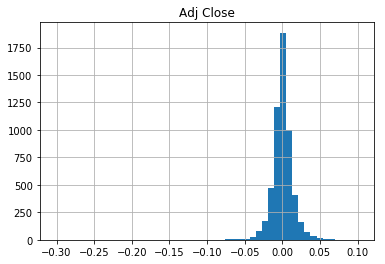

         Adj Close
count  5596.000000
mean      0.000419
std       0.014297
min      -0.302359
25%      -0.006127
50%       0.000150
75%       0.007033
max       0.102144


In [14]:
# Plot the distribution of `daily_pct_c`
daily_pct_c.hist(bins=50)

# Show the plot
plt.show()

# Pull up summary statistics
print(daily_pct_c.describe())

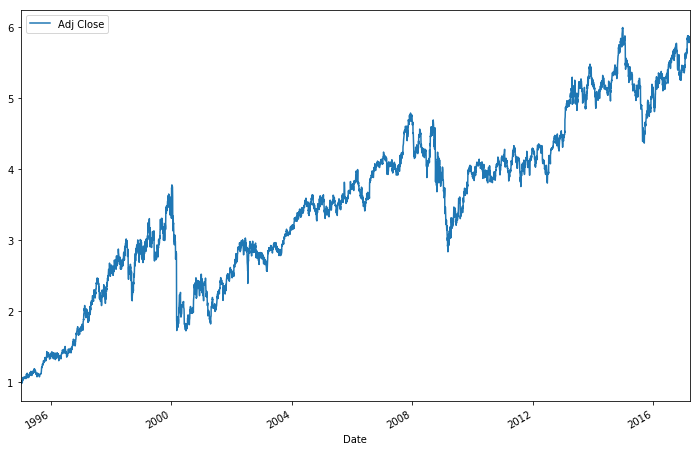

In [15]:
# Calculate the cumulative daily returns
cum_daily_return = (1 + daily_pct_c).cumprod()

# Plot the cumulative daily returns
cum_daily_return.plot(figsize=(12,8))

# Show the plot
plt.show()

In [16]:
# Resample the cumulative daily return to cumulative monthly return 
cum_monthly_return = cum_daily_return.resample("M").mean()

# Print the `cum_monthly_return`
cum_monthly_return.head()

,Adj Close
Date,
1995-01-31,1.001145
1995-02-28,1.053264
1995-03-31,1.085040
1995-04-30,1.093134
1995-05-31,1.120423


### Moving Window

In [18]:
# Isolate the adjusted closing prices 
adj_close_px = PG['Adj Close']

# Calculate the moving average
moving_avg = adj_close_px.rolling(window=40).mean()

# Inspect the result
moving_avg.tail()

Date
2017-03-17    89.445750
2017-03-20    89.540001
2017-03-21    89.645751
2017-03-22    89.724001
2017-03-23    89.814250
Name: Adj Close, dtype: float64

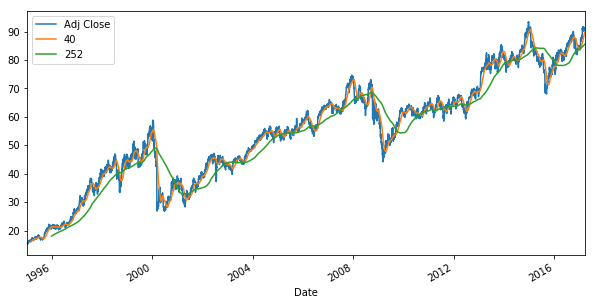

In [27]:
# Short moving window rolling mean
PG["40"] = adj_close_px.rolling(window=40).mean()

# Long moving window rolling mean
PG["252"] = adj_close_px.rolling(window=252).mean()

# Plot the adjusted closing price, the short and long windows of rolling means
PG[['Adj Close', '40', '252']].plot(figsize=(10,5))

plt.show()